In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Introduction à Scipy

Scipy contient des implémentations de plusieurs algorithmes numérique : 
* Fonctions spéciales
* Intégrales
* Equations différentielles
* Optimisation
* Algebre linéaires
* Transformée de Fourier

## Fonctions spéciales

Fonctions qui ne sont pas dans numpy : Bessel, Airy, fonction d'erreur, ... (Ce sont des fonctions définies par des intégrales)

Exemple : fonction erreur
    $$ \mathrm{erf}(x) = \int_0^x \frac{2}{\sqrt{\pi}} e^{-t^2} dt$$

In [2]:
from scipy.special import erf

erf(1)

0.8427007929497148

## Intégrales numériques

### Intégrale d'une fonction : 

Il existe plusieurs algorithme. Le plus simple : ``quad``



In [123]:
import numpy as np
from scipy.integrate import quad

In [124]:
quad?

In [128]:
def ma_fonction(t):
    return 2/np.sqrt(np.pi)*np.exp(-t**2)

# Renvoie la valeur et une estimation de l'incertitude
res, err = quad(ma_fonction, 0, 1)
print(res)
print(res - erf(1))

0.8427007929497149
1.1102230246251565e-16


In [129]:
def ma_fonction(t, sigma):
    return np.exp(-t**2/(2*sigma**2))

quad(ma_fonction, 0, 1, args=(0.45,))


(0.5491762723634688, 6.09708142155739e-15)

### Remarques

**Si on connait la fonction, ne pas en faire un tableau**

La fonction quad calcule automatiquement les points pour l'intégrale afin d'atteintre une erreur donnée

La fonction quad peut intégrer sur des bornes infinies (``np.inf``)

In [131]:
list_of_points = []
def ma_fonction(t):
    list_of_points.append(t)
    return 2/np.sqrt(np.pi)*np.exp(-t**2)
res, err = quad(ma_fonction, 0, np.inf)
print(res)
print("Nombre de points :" , len(list_of_points))
#print(list_of_points)
print("Erreur :", np.abs(res - 1 ))

0.9999999999999998
Nombre de points : 135
Erreur : 2.220446049250313e-16


In [8]:
print(list_of_points)

[1.0, 233.0651686899483, 0.0042906454260024365, 38.29883980138545, 0.026110451522446055, 13.799951646519888, 0.07246402202084402, 6.737877409458626, 0.14841469193194298, 3.8319360294671116, 0.26096469051417465, 2.366125858665451, 0.42263178703605525, 1.5245670511343803, 0.655923922306948, 3.0, 467.1303373798966, 1.0085812908520049, 77.5976796027709, 1.0522209030448921, 28.59990329303978, 1.144928044041688, 14.475754818917252, 1.2968293838638858, 8.663872058934224, 1.5219293810283492, 5.732251717330902, 1.8452635740721104, 4.049134102268761, 2.311847844613896, 0.3333333333333333, 0.9914917211633424, 0.002140730155975198, 0.9503707796587423, 0.01288698328505552, 0.8734173341321257, 0.03496515319488383, 0.771111460337607, 0.06908102634435172, 0.6570607102179157, 0.11542183370180259, 0.5419280009918633, 0.17445151561935043, 0.4325544184621764, 0.24696638213085922, 7.0, 935.2606747597932, 3.0171625817040097, 156.1953592055418, 3.1044418060897843, 58.19980658607956, 3.289856088083376, 29.951

### Intégrales d'un tableau de points

Utiliser la fonction trapz ou simps

11.5

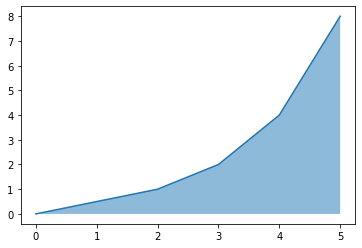

In [132]:
from scipy.integrate import trapz

data_y = [0, 1, 2, 4, 8]
data_x = [0, 2, 3, 4, 5]

plt.plot(data_x, data_y)
plt.fill_between(data_x, data_y, alpha=.5)

trapz(data_y, data_x)

## Equations différentielles

La librairie ``scipy.integrate`` contient des fonctions pour résoudre les équations différentielles ordinaires, c'est à dire des équations de la forme:

$$\frac{dy}{dt} = f(t, y)$$
    
avec conditions initiales (on connait $y$ à l'instant $t_0$). La variable $y$ peut être un tableau numpy.

On utilise la fonction ``solve_ivp`` (remplace ``ode`` ou ``odeint``): 

    def solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, ...)
    
Il existe plusieurs méthodes d'intégration (par défaut Runge-Kutta d'ordre 5(4) qui adapte la taille des pas)

La fonction ``solve_ivp`` renvoie un objet (dictionnaire) qui le résultat (res.y) mais aussi d'autres informations sur la convergence de l'algorithme.

Exemple : 
$$\frac{dy}{dt} = -y$$    



In [2]:
from scipy.integrate import solve_ivp
import numpy as np
# Solve initial value problem

def f(t, y):
    return -y

res = solve_ivp(f, t_span=[0, 4], y0=[1], t_eval=np.linspace(0, 4, 11), rtol=1E-7, atol=1E-7)
res

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 122
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ])
 t_events: None
        y: array([[1.        , 0.67032003, 0.44932895, 0.30119422, 0.20189653,
        0.13533529, 0.09071795, 0.06081007, 0.04076222, 0.02732372,
        0.01831566]])
 y_events: None

In [3]:
plt.plot(res.t, res.y[0], 'o')

NameError: name 'plt' is not defined

In [12]:
res.y[0, -1] - np.exp(-4)

1.773130557311542e-08

In [13]:
len(res.t)

11

In [137]:
# Utilisation d'un paramètre 
def f(t, y, tau):
    return -y/tau

res = solve_ivp(lambda t, y:f(t, y, tau=0.1), t_span=[0, 4], y0=[1], t_eval=np.linspace(0, 4, 11))
res

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 140
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ])
 t_events: None
        y: array([[ 1.00000000e+00,  1.83531441e-02,  3.36575782e-04,
         6.25529975e-06,  1.60535093e-07,  1.43992293e-07,
         9.50371941e-07,  7.83634365e-09, -2.64102615e-07,
        -4.41883282e-07,  2.53752885e-07]])
 y_events: None

## Equations différentielles d'ordre élevé

L'astuce consiste à augmenter la dimension de $y$ en rajoutant des fonctions intermédiaires qui sont les dérivées de la fonction initiale.

Par exemple l'équation 

$$\frac{d^2y}{dt^2} = \frac{f(y)}{m}$$

devient 

$$\frac d{dt} \begin{pmatrix}
y \\ 
y ^\prime
\end{pmatrix} = \begin{pmatrix}
y ^\prime \\
f(y)/m
\end{pmatrix} = F(y, y^\prime)$$


Voir le TD

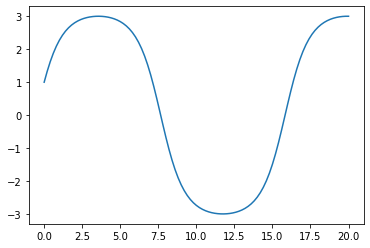

In [151]:
def f(t, Y):
    y, v = Y
    a = -np.sin(y)
    return [v, a]

y0 = [1, 1.75]

res = solve_ivp(f, t_span=[0, 20], y0=y0, t_eval=np.linspace(0, 20, 101), rtol=1E-7, atol=1E-7)
res

plt.plot(res.t, res.y[0])

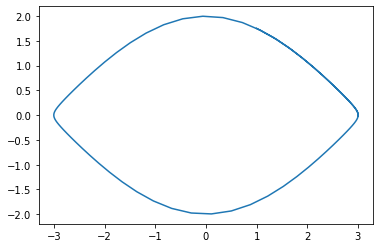

In [152]:
plt.plot(res.y[0], res.y[1])

# Optimisation
* Zeros d'une fonction
* Minimum
* Ajustement d'une courbe

Exemple : 
* première solution $>0$ de $\tan(x)=x$
* Premier minimum de $sinc(x)$

(-10.0, 10.0)

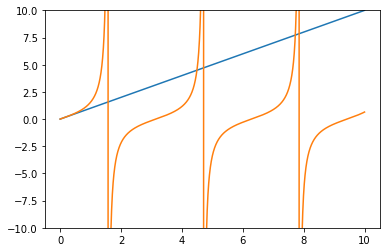

In [15]:
x = np.linspace(0, 10, 2001)
plt.plot(x, x)
plt.plot(x, np.tan(x))
plt.ylim(-10, 10)

In [153]:
from scipy.optimize import root_scalar

def f(x):
    return np.tan(x) - x

res = root_scalar(f, bracket=[4, 4.7], method='brentq')
res

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 4.493409457909064

4.493409457909064

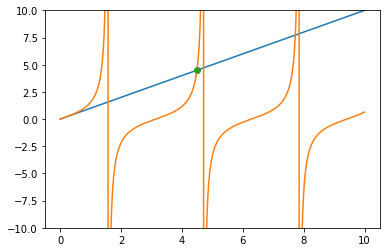

In [154]:
x = np.linspace(0, 10, 2001)
plt.plot(x, x)
plt.plot(x, np.tan(x))
plt.ylim(-10, 10)
plt.plot(res.root, [f(res.root)+res.root], 'o')

res.root

### Minimisation

In [155]:
def french_sinc(x):
    return np.sinc(x/np.pi)

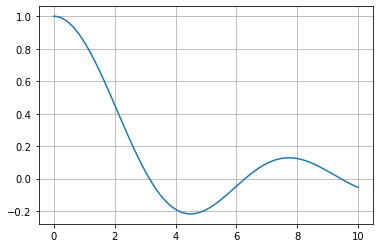

In [156]:
plt.plot(x, french_sinc(x))
plt.grid()

In [157]:
from scipy.optimize import minimize_scalar

In [158]:
res = minimize_scalar(french_sinc, [4, 4.71])
res

     fun: -0.21723362821122166
    nfev: 13
     nit: 9
 success: True
       x: 4.493409460723795

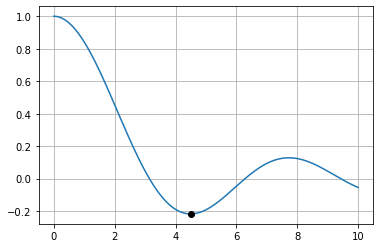

In [159]:
plt.plot(x, french_sinc(x))
plt.grid()
plt.plot(res.x, res.fun, 'ko')

In [162]:
y = french_sinc(x)
x[y.argmin()]

4.495

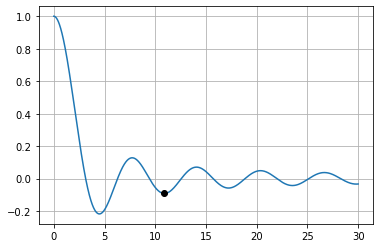

In [167]:
x = np.linspace(0, 30, 2001)
plt.plot(x, french_sinc(x))
plt.grid()
res = minimize_scalar(french_sinc, [10, 205])
plt.plot(res.x, res.fun, 'ko')

### Ajustement

Ajuster les franges d'un interféromètre atomique
* Faire un modèle avec les bons paramètres (ni trop, ni pas assez)
* Trouver des paramètres initiaux approximatif avant de faire le fit
* Vérifier que le fit à bien convergé !

In [168]:
from scipy.optimize import curve_fit
freq, amp = np.loadtxt('fit_sinus.dat', unpack=True)

Text(0, 0.5, 'Amplitude (Hz)')

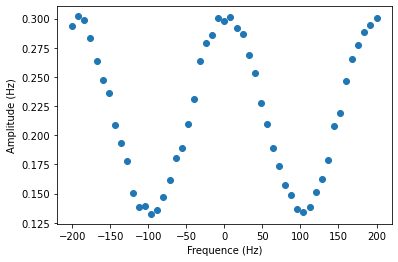

In [169]:
plt.plot(freq, amp, 'o')
plt.xlabel('Frequence (Hz)')
plt.ylabel('Amplitude (Hz)')

In [38]:
def modele(x, amplitude, offset, position, largeur):
    return offset + amplitude*(1+np.cos(2*np.pi*(x-position)/largeur))/2

Text(0, 0.5, 'Amplitude (Hz)')

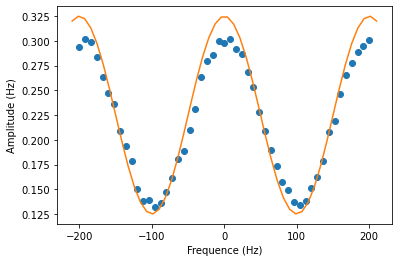

In [170]:
x_plot = np.linspace(-210, 210)

p0 = (0.2, 0.125, 0, 200)

plt.plot(freq, amp, 'o')
plt.plot(x_plot, modele(x_plot, *p0))
plt.xlabel('Frequence (Hz)')
plt.ylabel('Amplitude (Hz)')

[1.65555541e-01 1.35668464e-01 2.36767463e+00 1.98438979e+02]


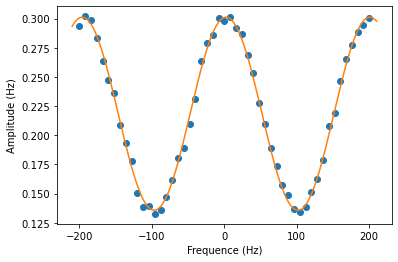

In [172]:
p0 = (0.2, 0.125, 0, 200)

popt, pcov = curve_fit(modele, freq, amp, p0) # toujours mettre p0

x_plot = np.linspace(-210, 210, 200)

plt.plot(freq, amp, 'o')
plt.plot(x_plot, modele(x_plot, *popt))
plt.xlabel('Frequence (Hz)')
plt.ylabel('Amplitude (Hz)')
print(popt)

In [44]:
# Matrice de covariance
print(pcov)

[[ 2.65188549e-06 -1.31309382e-06  2.19729691e-06  1.22183038e-04]
 [-1.31309382e-06  1.04327440e-06 -3.62814620e-07  8.57289819e-05]
 [ 2.19729691e-06 -3.62814620e-07  1.00116187e-01  5.79037311e-04]
 [ 1.22183038e-04  8.57289819e-05  5.79037311e-04  3.71813076e-01]]


In [176]:
# Incertitude sur les paramètres
np.sqrt(np.diag(pcov))

array([0.00162846, 0.00102141, 0.31641142, 0.60976477])

In [177]:
# Matrice normalisée par les incertitudes
print(np.linalg.inv(np.diag(np.sqrt(np.diag(pcov))))@pcov@np.linalg.inv(np.diag(np.sqrt(np.diag(pcov)))))

[[ 1.         -0.78943995  0.00426441  0.12304705]
 [-0.78943995  1.         -0.00112262  0.13764678]
 [ 0.00426441 -0.00112262  1.          0.00300118]
 [ 0.12304705  0.13764678  0.00300118  1.        ]]


# Algèbre linéaire

numpy.linalg et scipy.linalg (plus de fonction dans scipy)

* Matrice : np.matrix (produit matriciel)
* Inverse de matrice
* Diagonalisation/valeurs propres/vecteurs propres

Exemple: valeurs propres de 
$$\begin{bmatrix}
1 & 1 & 0\\
1 & 0 & 1 \\
0  & 1 & -1\\
\end{bmatrix}$$

Tracer les vp en fonction de $\delta$ pour $\Omega=1$
$$\begin{bmatrix}
\delta & \frac\Omega2 & 0\\
\frac\Omega2 & 0 & \frac\Omega2 \\
0  & \frac\Omega2 & -\delta\\
\end{bmatrix}$$

In [91]:
H = np.matrix([[1, 1, 0], [1, 0, 1], [0, 1, -1]])
H

matrix([[ 1,  1,  0],
        [ 1,  0,  1],
        [ 0,  1, -1]])

In [92]:
from scipy.linalg import eigh # Matrice hermicienne

eigh(H) # Renvoie les valeurs propres et vecteurs propres

(array([-1.73205081,  0.        ,  1.73205081]),
 array([[-0.21132487,  0.57735027,  0.78867513],
        [ 0.57735027, -0.57735027,  0.57735027],
        [-0.78867513, -0.57735027,  0.21132487]]))

In [94]:
def trois_niveaux(delta, omega):
    H = np.matrix([[delta, omega/2, 0], [omega/2, 0, omega/2], [0, omega/2, -delta]])
    return eigh(H)[0]
    
all_delta = np.linspace(-5, 5)
sans_couplage = np.array([trois_niveaux(delta, omega=0) for delta in all_delta])
avec_couplage = np.array([trois_niveaux(delta, omega=1) for delta in all_delta])

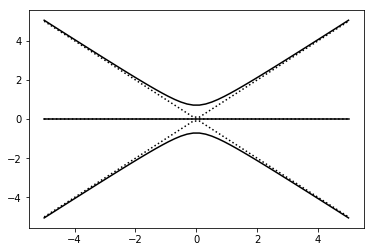

In [150]:
plt.plot(all_delta, sans_couplage, 'k:')
plt.plot(all_delta, avec_couplage, 'k-')

# Transformée de Fourier

Discret Fourier Transform - DFT (algorithm : Fast Fourier Transform = FFT)

$N$ points $x_i$

$$ \tilde x_k = \sum_i x_i e^{-2j\pi k\frac{i}{N}}$$

Signal de durée $T$ échantillonée avec $dt$ : $T = N dt$

Fréquence minimum : $1/T$

Fréquence maximum : $\frac 1{2dt}$ (Nyquist)

Le point $\tilde x_k$ a une fréquence $k/T$

Attention : la DFT suppose implicitement que la fonction est périodique de période $T$.

Utilisation : filtre, convolution. 

FFT : complexité en $N \log(N)$

Librairie numpy : 
* `np.fft.fft`; `np.fft.ifft`
* `np.fft.rfft`; `np.fft.irfft` (signaux réél -> fréquences >0). Evite les nb complexe
* `np.fft.fftfreq`; `np.fft.fftshift`

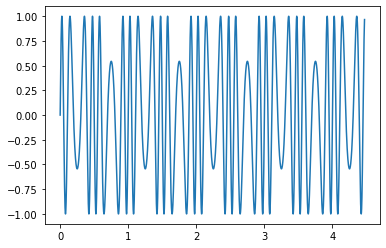

In [179]:
N = 20000
dx = 0.0002235467432
x = np.arange(N)*dx

y = np.sin(10*np.sin(2*np.pi*x))

plt.plot(x, y)

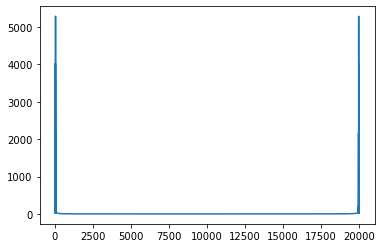

In [180]:
ytilde = np.fft.fft(y)
plt.plot(np.abs(ytilde))

Text(0.5, 0, 'Frequence')

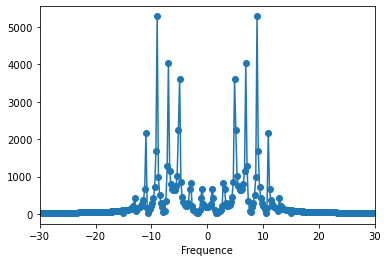

In [181]:
freq = np.fft.fftfreq(N, dx)
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(ytilde)), '-o')
plt.xlim(-30, 30)
plt.xlabel('Frequence')